# Exercise 4: recommender System

In [1]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/JonasZimmer1994/DataScienceSS20.git
  path='DataScienceSS20'

running in Colab: True
Cloning into 'DataScienceSS20'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 315 (delta 4), reused 4 (delta 2), pack-reused 304
Receiving objects: 100% (315/315), 45.54 MiB | 20.68 MiB/s, done.
Resolving deltas: 100% (121/121), done.


## Code from the lecture

In [0]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(path+'/DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(path+'/DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv(path+'/DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [0]:
def getTopN(movie_id,N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title)))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [0]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

In [0]:
import scipy.spatial
D=scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R.T, metric='cosine'))
D=np.abs(np.nan_to_num( D-1)) #dist to similarity 
np.fill_diagonal(D,0) #set self-dist to zero

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

In [0]:
D2 = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R.T, metric='euclidean'))
D2 = np.abs(np.nan_to_num (D2-1))
np.fill_diagonal(D2, 0)

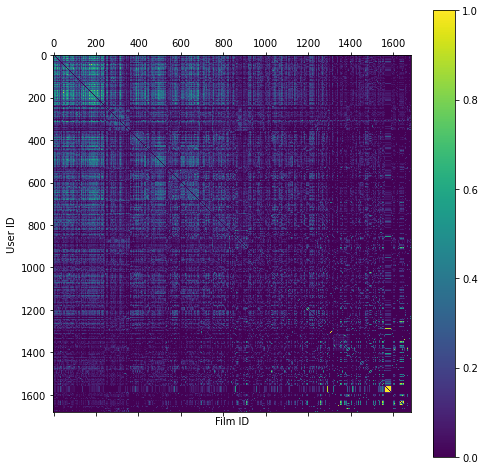

In [179]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)    
plt.matshow(D)
plt.xlabel('Film ID')
plt.ylabel('User ID')
plt.colorbar()

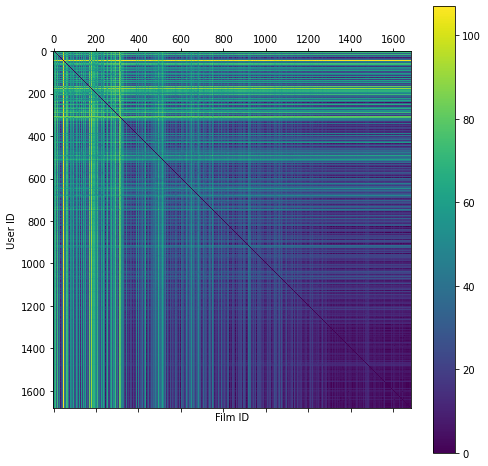

In [180]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)    
plt.matshow(D2)
plt.xlabel('Film ID')
plt.ylabel('User ID')
plt.colorbar()

## 4.2 Baseline Results
Implement and compare results of
* random recommendations
* allways recommending the top 5 movies (over all users)

In [0]:
import random
def getRandomN(movie_id,N=5):
    movie_list = D[movie_id,:].argsort()
    np.random.shuffle(movie_list)
    return movie_list[-N:]

In [0]:
def RandomCII(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getRandomN(getIDbyName(title)))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
     

In [136]:
RandomCII('Titanic')

recommending movies for: 'Titanic (1997)'


1224                                    Angus (1995)
1561    Eye of Vichy, The (Oeil de Vichy, L') (1993)
740                          Last Supper, The (1995)
14                         Mr. Holland's Opus (1995)
221                  Star Trek: First Contact (1996)
Name: title, dtype: object

In [134]:
CII('Titanic')

recommending movies for: 'Titanic (1997)'


728                             Nell (1994)
103                     Theodore Rex (1995)
645     Once Upon a Time in the West (1969)
844               That Thing You Do! (1996)
1172                           Bliss (1997)
Name: title, dtype: object

In [137]:
RandomCII('Star Wars')

recommending movies for: 'Star Wars (1977)'


75           Carlito's Way (1993)
418           Mary Poppins (1964)
276            Restoration (1995)
374              Showgirls (1995)
1529    Jefferson in Paris (1995)
Name: title, dtype: object

In [138]:
CII('Star Wars')

recommending movies for: 'Star Wars (1977)'


180          Return of the Jedi (1983)
173     Raiders of the Lost Ark (1981)
171    Empire Strikes Back, The (1980)
0                     Toy Story (1995)
126              Godfather, The (1972)
Name: title, dtype: object

In [146]:
RandomCII('House Party 3')

recommending movies for: 'House Party 3 (1994)'


429                          Duck Soup (1933)
164                   Jean de Florette (1986)
251     Lost World: Jurassic Park, The (1997)
98     Snow White and the Seven Dwarfs (1937)
976                    Substitute, The (1996)
Name: title, dtype: object

In [147]:
CII('House Party 3')

recommending movies for: 'House Party 3 (1994)'


1497          Farmer & Chase (1995)
1485    Girl in the Cadillac (1995)
1492        Modern Affair, A (1995)
1491         Window to Paris (1994)
1493              Mostro, Il (1994)
Name: title, dtype: object

## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $R$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct R and evaluate $R'$
* compute the distance between two movies using $R'$


In [0]:
 u, s, vh = np.linalg.svd(R, full_matrices=True)

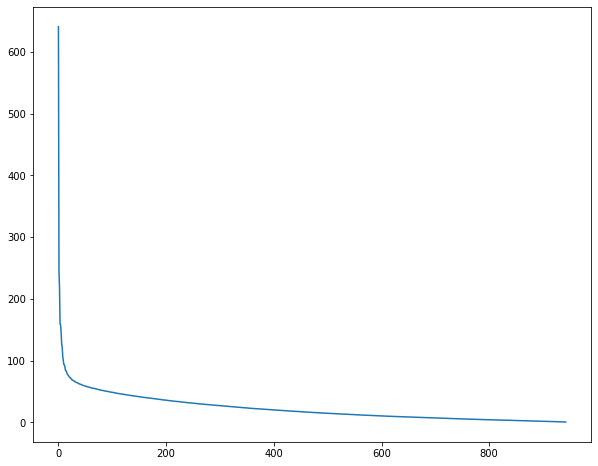

In [161]:
plt.plot(s)

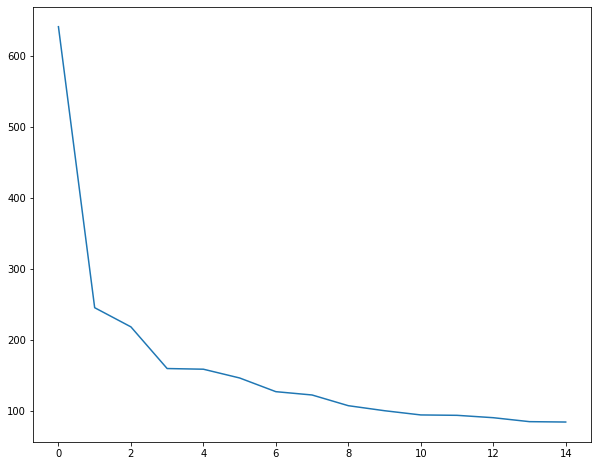

In [177]:
plt.plot(s[:15])

In [0]:
cut = 15

In [0]:
R1 = np.dot(u[:,:cut]*s[:cut],vh[:cut,:])

In [0]:
D3 = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(R1.T, metric='cosine'))
D3 = np.abs(np.nan_to_num (D3-1))
np.fill_diagonal(D3, 0)

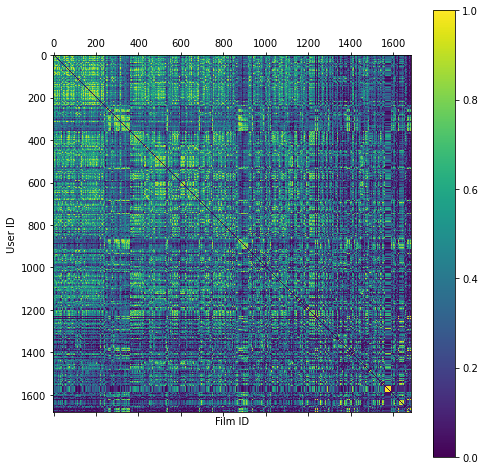

In [184]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)    
plt.matshow(D3)
plt.xlabel('Film ID')
plt.ylabel('User ID')
plt.colorbar()